<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Card-spending-data" data-toc-modified-id="Card-spending-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Card spending data</a></span><ul class="toc-item"><li><span><a href="#Part-(a)" data-toc-modified-id="Part-(a)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Part (a)</a></span><ul class="toc-item"><li><span><a href="#Code-implementation" data-toc-modified-id="Code-implementation-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Code implementation</a></span></li><li><span><a href="#Final-answers" data-toc-modified-id="Final-answers-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Final answers</a></span></li></ul></li><li><span><a href="#Part-(b)" data-toc-modified-id="Part-(b)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Part (b)</a></span><ul class="toc-item"><li><span><a href="#Code-implementation" data-toc-modified-id="Code-implementation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Code implementation</a></span></li><li><span><a href="#Final-answers" data-toc-modified-id="Final-answers-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Final answers</a></span></li></ul></li><li><span><a href="#Part-(c)" data-toc-modified-id="Part-(c)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Part (c)</a></span><ul class="toc-item"><li><span><a href="#Final-answers" data-toc-modified-id="Final-answers-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Final answers</a></span></li></ul></li><li><span><a href="#Part-(d)" data-toc-modified-id="Part-(d)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Part (d)</a></span><ul class="toc-item"><li><span><a href="#Code-implementation" data-toc-modified-id="Code-implementation-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Code implementation</a></span></li><li><span><a href="#Final-answer" data-toc-modified-id="Final-answer-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Final answer</a></span></li></ul></li></ul></li></ul></div>

# Card spending data

> The `daily_card_spending.csv` file contains daily card spending data for 10 U.S. retail & e-commerce companies, sampled from an aggregate and anonymous panel of U.S. credit and debit cards. Similarly, the `quarterly_reported_sales.csv` file contains the reported global sales for each financial quarter, for the same 10 companies. Note that in the latter data set, values for reporting dates that have not yet occurred are in fact estimates, and not actual reported figures.

I first read the data into `pd.DataFrame` and do an initial exploration:

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn
%matplotlib inline
plt.style.use('seaborn')

This is a function that I will be using later:

In [2]:
def get_quarterly_spend(daily_card_spend, quarterly_sales):
    dfs = []
    for ticker, df in quarterly_sales.groupby(level=0):
        quarter_ends = df.reset_index()['fin_quarter_end'].values
        ticker_daily_spend = daily_card_spend.iloc[daily_card_spend.index.get_level_values('ticker') == ticker]
        aggregates, n = [], []

        for i in range(len(quarter_ends)):
            if i == 0:
                spend_values = ticker_daily_spend.iloc[
                    ticker_daily_spend.index.get_level_values('date') <= quarter_ends[i]
                    ]['card_spend']
            else:
                spend_values = ticker_daily_spend.iloc[
                    (ticker_daily_spend.index.get_level_values('date') > quarter_ends[i - 1]) & \
                    (ticker_daily_spend.index.get_level_values('date') <= quarter_ends[i])
                ]['card_spend']
            aggregates.append(spend_values.sum())
            n.append(len(spend_values))
        df['aggregate_daily_spend'] = aggregates
        df['n_observations'] = n
        dfs.append(df)
    return pd.concat(dfs)

In [3]:
# Read in the csv files
daily_card_spend = pd.read_csv('data/task1/daily_card_spending.csv')
quarterly_sales = pd.read_csv('data/task1/quarterly_reported_sales.csv')

daily_card_spend['date'] = pd.to_datetime(daily_card_spend['date'])
daily_card_spend.set_index(['ticker', 'date'], inplace=True)
daily_card_spend.sort_index(inplace=True)

quarterly_sales['report_date'] = pd.to_datetime(quarterly_sales['report_date'])
quarterly_sales['fin_quarter_end'] = pd.to_datetime(quarterly_sales['fin_quarter_end'])
quarterly_sales.set_index(['ticker', 'fin_quarter_end'], inplace=True)
quarterly_sales.sort_index(inplace=True)

In [4]:
daily_card_spend

company_name  card_spend
ticker date                                 
CPRT   2015-01-01   Copart, Inc.      1032.0
       2015-01-02   Copart, Inc.      1105.0
       2015-01-03   Copart, Inc.      2484.0
       2015-01-04   Copart, Inc.       634.0
       2015-01-05   Copart, Inc.      1452.0
...                          ...         ...
W      2020-09-13  Wayfair, Inc.    293647.0
       2020-09-14  Wayfair, Inc.    983030.0
       2020-09-15  Wayfair, Inc.    799233.0
       2020-09-16  Wayfair, Inc.    749502.0
       2020-09-17  Wayfair, Inc.    780615.0

[20870 rows x 2 columns]

In [5]:
quarterly_sales

proper_name metric report_date  reported_sales
ticker fin_quarter_end                                                  
CPRT   2015-01-31        Copart, Inc.  SALES  2015-02-25         276.258
       2015-04-30        Copart, Inc.  SALES  2015-05-28         297.142
       2015-07-31        Copart, Inc.  SALES  2015-09-23         282.293
       2015-10-31        Copart, Inc.  SALES  2015-11-24         288.838
       2016-01-31        Copart, Inc.  SALES  2016-02-24         299.706
...                               ...    ...         ...             ...
W      2019-12-31       Wayfair, Inc.  SALES  2020-02-28        2533.490
       2020-03-31       Wayfair, Inc.  SALES  2020-05-05        2330.063
       2020-06-30       Wayfair, Inc.  SALES  2020-08-05        4304.672
       2020-09-30       Wayfair, Inc.  SALES  2020-10-29        2330.063
       2020-09-30       Wayfair, Inc.  SALES  2020-10-29        4304.672

[238 rows x 4 columns]

In addition, the rest of the questions require that the estimates are all filtered out. The estimates can be identified as the rows that contain `report_date` values that occur *after* 2020-11-01.

In [6]:
current_date = pd.to_datetime('2020-11-01')
print('Number of rows before:', len(quarterly_sales))

quarterly_sales = quarterly_sales[quarterly_sales['report_date'] <= current_date]
print('Number of rows after:', len(quarterly_sales))

Number of rows before: 238
Number of rows after: 230


## Part (a)

i) Supposing that the present date is 1 Nov 2020, filter out any estimates and aggregate each company’s card spending at the quarterly frequency. Mathematically, for each company $i$, financial quarter $j$, and day $k$, compute $x_{ij}$ given by:

\begin{equation}
    x_{ij} = \sum_k x_{ijk},\quad \text{for all } i \text{ and } j,
\end{equation}

where $x_{ijk} \subseteq [0,\infty)$ denotes daily card spending.

ii) Next, compute the quarter-on-quarter percent change in both quarterly-aggregated
card spending and quarterly reported sales, that is,

\begin{equation}
\dot{x}_{ij} = \frac{x_{ij} − x_{i,j−1}}{x_{i,j−1}} \text{ and } \dot{y}_{ij} = \frac{y_{ij} − y_{i,j−1}}{y_{i,j−1}}
\end{equation}

where $y_{ij} \subseteq [0,\infty)$ denotes reported sales for company $i$ in financial quarter $j$.

### Code implementation

I use the function defined above, `get_quarterly_spend`:

In [7]:
df = get_quarterly_spend(daily_card_spend, quarterly_sales)
df

proper_name metric report_date  reported_sales  \
ticker fin_quarter_end                                                     
CPRT   2015-01-31        Copart, Inc.  SALES  2015-02-25         276.258   
       2015-04-30        Copart, Inc.  SALES  2015-05-28         297.142   
       2015-07-31        Copart, Inc.  SALES  2015-09-23         282.293   
       2015-10-31        Copart, Inc.  SALES  2015-11-24         288.838   
       2016-01-31        Copart, Inc.  SALES  2016-02-24         299.706   
...                               ...    ...         ...             ...   
W      2019-12-31       Wayfair, Inc.  SALES  2020-02-28        2533.490   
       2020-03-31       Wayfair, Inc.  SALES  2020-05-05        2330.063   
       2020-06-30       Wayfair, Inc.  SALES  2020-08-05        4304.672   
       2020-09-30       Wayfair, Inc.  SALES  2020-10-29        2330.063   
       2020-09-30       Wayfair, Inc.  SALES  2020-10-29        4304.672   

                        aggregate_daily_spend  n_observations  
ticker fin_quarter_end                                         
CPRT   2015-01-31                     50356.0              31  
       2015-04-30                    306036.0              89  
       2015-07-31                    415778.0              92  
       2015-10-31                    248925.0              92  
       2016-01-31                    280578.0              92  
...                                       ...             ...  
W      2019-12-31                  35282084.0              92  
       2020-03-31                  34083691.0              91  
       2020-06-30                  68143587.0              91  
       2020-09-30                  51050493.0              79  
       2020-09-30                         0.0               0  

[230 rows x 6 columns]

Rows with a low number of observations from from the earliest quarter (ending 2015-01-31) and the latest quarter (ending 2020-09-30). I therefore strip the start and the end of the data set as follows:

In [8]:
date1, date2 = pd.to_datetime('2015-01-31'), pd.to_datetime('2020-09-30')
df = df.iloc[(df.index.get_level_values('fin_quarter_end') > date1) &\
             (df.index.get_level_values('fin_quarter_end') < date2)]
df

proper_name metric report_date  reported_sales  \
ticker fin_quarter_end                                                     
CPRT   2015-04-30        Copart, Inc.  SALES  2015-05-28         297.142   
       2015-07-31        Copart, Inc.  SALES  2015-09-23         282.293   
       2015-10-31        Copart, Inc.  SALES  2015-11-24         288.838   
       2016-01-31        Copart, Inc.  SALES  2016-02-24         299.706   
       2016-04-30        Copart, Inc.  SALES  2016-05-26         347.246   
...                               ...    ...         ...             ...   
W      2019-06-30       Wayfair, Inc.  SALES  2019-08-01        2343.251   
       2019-09-30       Wayfair, Inc.  SALES  2019-10-31        2305.487   
       2019-12-31       Wayfair, Inc.  SALES  2020-02-28        2533.490   
       2020-03-31       Wayfair, Inc.  SALES  2020-05-05        2330.063   
       2020-06-30       Wayfair, Inc.  SALES  2020-08-05        4304.672   

                        aggregate_daily_spend  n_observations  
ticker fin_quarter_end                                         
CPRT   2015-04-30                    306036.0              89  
       2015-07-31                    415778.0              92  
       2015-10-31                    248925.0              92  
       2016-01-31                    280578.0              92  
       2016-04-30                    362483.0              90  
...                                       ...             ...  
W      2019-06-30                  33921979.0              91  
       2019-09-30                  34532779.0              92  
       2019-12-31                  35282084.0              92  
       2020-03-31                  34083691.0              91  
       2020-06-30                  68143587.0              91  

[220 rows x 6 columns]

### Final answers

In [9]:
df['x_dot'] = df.groupby(level=0)['aggregate_daily_spend'].pct_change(1)
df['y_dot'] = df.groupby(level=0)['reported_sales'].pct_change(1)
df.dropna(inplace=True)  # lose one data-point due to pct_change calculation
df

proper_name metric report_date  reported_sales  \
ticker fin_quarter_end                                                     
CPRT   2015-07-31        Copart, Inc.  SALES  2015-09-23         282.293   
       2015-10-31        Copart, Inc.  SALES  2015-11-24         288.838   
       2016-01-31        Copart, Inc.  SALES  2016-02-24         299.706   
       2016-04-30        Copart, Inc.  SALES  2016-05-26         347.246   
       2016-07-31        Copart, Inc.  SALES  2016-09-21         332.659   
...                               ...    ...         ...             ...   
W      2019-06-30       Wayfair, Inc.  SALES  2019-08-01        2343.251   
       2019-09-30       Wayfair, Inc.  SALES  2019-10-31        2305.487   
       2019-12-31       Wayfair, Inc.  SALES  2020-02-28        2533.490   
       2020-03-31       Wayfair, Inc.  SALES  2020-05-05        2330.063   
       2020-06-30       Wayfair, Inc.  SALES  2020-08-05        4304.672   

                        aggregate_daily_spend  n_observations     x_dot  \
ticker fin_quarter_end                                                    
CPRT   2015-07-31                    415778.0              92  0.358592   
       2015-10-31                    248925.0              92 -0.401303   
       2016-01-31                    280578.0              92  0.127159   
       2016-04-30                    362483.0              90  0.291915   
       2016-07-31                    403763.0              92  0.113881   
...                                       ...             ...       ...   
W      2019-06-30                  33921979.0              91  0.194897   
       2019-09-30                  34532779.0              92  0.018006   
       2019-12-31                  35282084.0              92  0.021698   
       2020-03-31                  34083691.0              91 -0.033966   
       2020-06-30                  68143587.0              91  0.999302   

                           y_dot  
ticker fin_quarter_end            
CPRT   2015-07-31      -0.049973  
       2015-10-31       0.023185  
       2016-01-31       0.037627  
       2016-04-30       0.158622  
       2016-07-31      -0.042008  
...                          ...  
W      2019-06-30       0.204862  
       2019-09-30      -0.016116  
       2019-12-31       0.098896  
       2020-03-31      -0.080295  
       2020-06-30       0.847449  

[210 rows x 8 columns]

## Part (b)

i) For each company i, compute the historical correlation between $\dot{x}_{ij}$ and $\dot{y}_{ij}$, printing your final output clearly.

ii) Choosing the company with the strongest correlation, and the company with the weakest correlation, explain intuitively using plots or otherwise, the difference between the two computed correlations.

### Code implementation

In [10]:
correlations = df.groupby(level=0)[['x_dot', 'y_dot']].corr()
correlations = correlations.reset_index()[['ticker', 'y_dot']].drop_duplicates('ticker', keep='first').set_index('ticker')
correlations.columns = ['corr_coeff']

### Final answers

First I print the DataFrame containing the historical correlation between the quarter-on-quarter percent change in the quarterly-aggregated card spending, and the quarterly reported sales:

In [11]:
correlations

,corr_coeff
ticker,
CPRT,0.164471
LULU,0.987963
MUSA,0.985412
RGS,0.916147
SBH,0.597312
SFM,0.862337
STMP,0.818627
SWK,0.383169
ULTA,0.987248


First, I identify the company that exhibits the strongest historical correlation, and the company that exhibits the weakest historical correlation:

In [12]:
strong_ticker, strong_corrval = correlations.idxmax().values[0], correlations.max().values[0]
weak_ticker, weak_corrval = correlations.idxmin().values[0], correlations.min().values[0]

print('Strongest Correlation:', strong_ticker, '({})'.format(round(strong_corrval, 5)))
print('Weakest Correlation:', weak_ticker, '({})'.format(round(weak_corrval, 5)))

Strongest Correlation: LULU (0.98796)
Weakest Correlation: CPRT (0.16447)


Correlation is a measure of the linear relationship between two variables. The Pearson Correlation Coefficient takes values between -1 and 1, where 1 shows perfect *positive* correlation, -1 shows perfect *negative* correlation, and 0 indicates no correlation whatsoever.

This can be visualized by creating a simple scatter plot of $\dot{x}_{ij}$ and $\dot{y}_{ij}$ for LULU and CPRT:

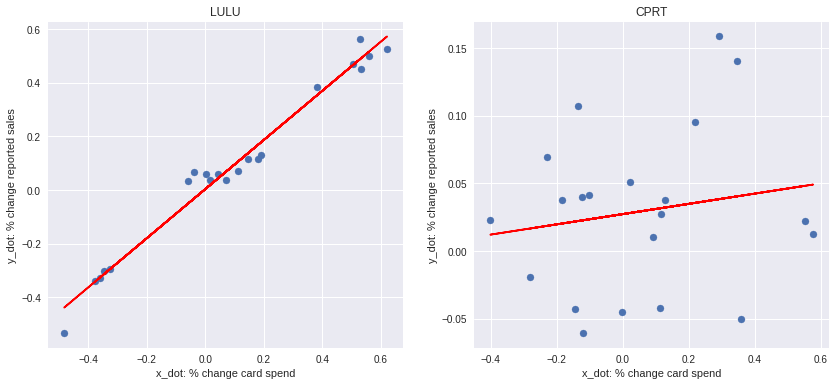

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

for idx, ticker in enumerate([strong_ticker, weak_ticker]):
    
    data = df.loc[ticker, :]
    m, b = np.polyfit(data['x_dot'], data['y_dot'], 1)  # create a simple trendline
    ax[idx].scatter(data['x_dot'], data['y_dot'])
    ax[idx].plot(data['x_dot'], m * data['x_dot'] + b, color='red')
    ax[idx].set_xlabel('x_dot: % change card spend')
    ax[idx].set_ylabel('y_dot: % change reported sales')
    ax[idx].set_title(ticker)

As shown in the figure above, LULU exhibits an almost perfect positive correlation (0.988) between the percent change of quarterly card spend and reported quarterly sales. Therefore, the trendline shows an upward positive slope. On the other hand, CPRT has a correlation coefficient that is significantly lower (0.164).

## Part (c)

### Final answers

Briefly explain why:

i) correlation between $\dot{x}_{ij}$ and $\dot{y}_{ij}$ might be weak for some companies;

> For companies that exhibit weak correlation, it is possible that card transactions do not form a substantial portion of their sales revenue. If that is the case, large changes in debit/ credit card spend will not significantly affect the quarterly sales revenue figures.

ii) the correlations in part (b) should not be used to make inferences about data that occur early in the sample (e.g. in Jan 2016), and how you would correct for this;

> The sample correlation coefficient is calculated using data up until the present-day. Therefore, any conclusions drawn from the above analysis cannot be used to make inferences on events that occured in the past. This is because future data would not have been available at that point in time. This is an example of *lookahead bias*. To resolve this, one would calculate the correlation coefficient with either a fixed rolling window, or an expanding window.

iii) we do not instead compute correlations between $x_{ij}$ and $y_{ij}$, which are in levels.

> The topic of interest is the relationship between the growth of $x_{ij}$ and the growth of $y_{ij}$. In absolute terms, $x_{ij}$ and $y_{ij}$ exist on different scales and cannot be compared directly - one would find spurious correlations. In addition, there is an assumption of weak-stationarity when calculating the correlation coefficient (constant mean and variance). Taking a first order difference is a common way of enforcing stationarity of the trend - similar to how one always models *returns* rather than *price* for stock analysis.

## Part (d)

Again filtering out any estimates, compute the cumulative quarter-to-date quarter-on-quarter percent change in daily card spending for each company, that is,

\begin{equation}
    \dot{x}_{ijk} = \frac{x^{*}_{ijk} − x^{*}_{i,j-1,k}}{x^*_{i,j-1,k}} \quad \text{where  } x^{*}_{ijk} = \sum_{t=1}^k x_{ijt}
\end{equation}

for each company $i$, financial quarter $j$, and day $k$. Clearly print your output for the
latest available day for each company. Note that as the financial quarters may have
different numbers of days, the computed percent changes will be NA on certain days

### Code implementation

In [14]:
cumulative_change = (df['x_dot'] + 1).groupby(level=0).cumprod() - 1
cumulative_change = cumulative_change.groupby(level='ticker').last().to_frame()
cumulative_change.columns = ['cumulative_pct_change']

### Final answer

In [15]:
cumulative_change

,cumulative_pct_change
ticker,
CPRT,0.515567
LULU,1.084889
MUSA,-0.009283
RGS,-0.801874
SBH,-0.095118
SFM,0.889502
STMP,1.007789
SWK,2.186397
ULTA,0.123104
